<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana7/Descenso2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def f2(x,y):
  return x**4 + y**4 -2*(x-y)**2

In [3]:
Dx = lambda x,y,h=1e-5: (f2(x+h,y)-f2(x-h,y))/(2*h)
Dy = lambda x,y,h=1e-5: (f2(x,y+h)-f2(x,y-h))/(2*h)

In [4]:
Gradient = lambda x,y: np.array([Dx(x,y),Dy(x,y)])

In [29]:
def Minimizer(f, N = 1000, gamma = 0.01):

  # Estructura de datos a usar
  r = np.zeros((N,2))

  r[0] = np.random.uniform(-3,3,size=2)

  Grad = np.zeros_like(r)
  Grad[0] = Gradient(r[0,0],r[0,1])

  for i in range(1,N):
    r[i] = r[i-1] - gamma*Grad[i-1]
    Grad[i] = Gradient(r[i,0],r[i,1])

  return r

In [30]:
r = Minimizer(f2)

In [31]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)

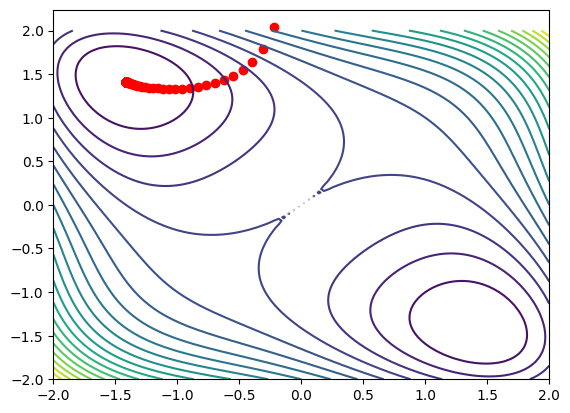

In [32]:
plt.contour(X,Y,Z,20)
plt.scatter(r[:,0],r[:,1],c='r')